<a href="https://colab.research.google.com/github/hopedom/DS5/blob/main/day3_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%8B%9C%EA%B3%84%EC%97%B4%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트: ARIMA, ARCH
**미니프로젝트의 목표!**
___
- Objective 1: 직접 ARIMA를 통해 시계열 예측을 수행해보자!

- Objective 2: 직접 ARCH를 통해 S&P500의 변동성을 모델링하자!

용어 설명
___
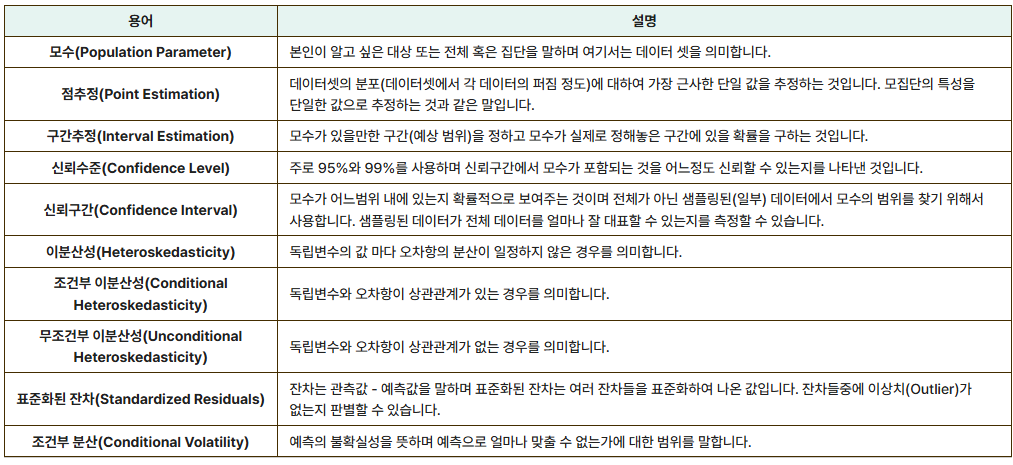

미니 프로젝트 목차
___
① 데이터 연결하기

② ARIMA 실습해보기!

③ 데이터 확인하기

④ 분산을 일정하게 만들기 - log transformation

⑤ 차분을 통해 분석하기

⑥ Auto ARIMA 적용 및 결과 확인

⑦ ARCH 모델 실습해보기

## ① 데이터 연결하기
- 필요한 라이브러리 설치 (pmdarima, arch)
- 데이터가 있는 폴더를 연결합니다.
- arch를 설치합니다.

In [1]:
!pip uninstall -y numpy pmdarima
!pip install arch==6.3.0
!pip install numpy==1.26.4 pmdarima==2.0.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.3 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but 

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.

## ② ARIMA 실습해보기!

앞에서도 자주 만났던 AirPassengers 데이터셋을 SARIMA를 통해 예측해봅시다.

- 시계열 데이터 분석을 위한 라이브러리를 불러옵니다.
- AirPassengers 데이터셋을 불러옵니다.
- AirPassengers 데이터셋의 Month column을 제외합니다.





In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

import warnings
warnings.filterwarnings('ignore')

#ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')
ap = pd.read_csv('/content/drive/MyDrive/DS/6.시계열/AirPassengers.csv')
ap.drop('Month', axis = 1, inplace = True)
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


## ③ 데이터 확인하기
- AirPassengers 데이터셋에서 Month가 제대로 제외되었는지 확인합니다.

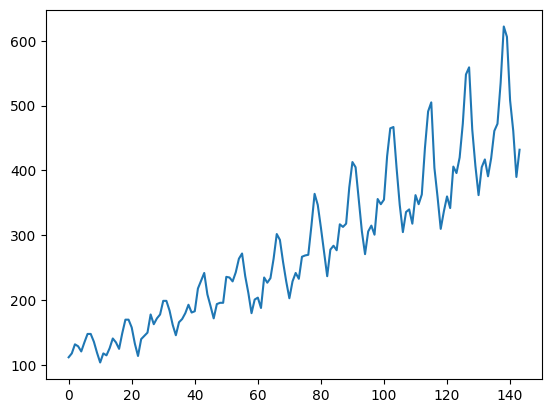

In [22]:
plt.plot(ap)
plt.show()

## ④ 분산을 일정하게 만들기 - log transformation

- 로그변환(Log Transformation)을 통해 분산을 일정하게 조절합니다.
- 분산이 일정하게 적용되었는지 시각화한 후 확인합니다.

In [23]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


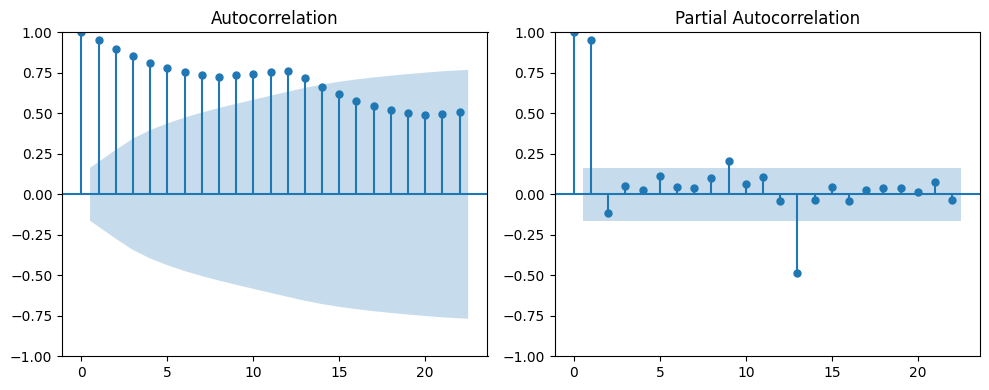

In [24]:
plt.figure(figsize = (10, 4))

plt.subplot(121)
plot_acf(ap_transformed, ax = plt.gca())

plt.subplot(122)
plot_pacf(ap_transformed, ax = plt.gca())

plt.tight_layout()
plt.show()

##⑤ 차분을 통해 분석하기
- ACF, PACF Plot과 차분을 활용하여 분석합니다.

In [25]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

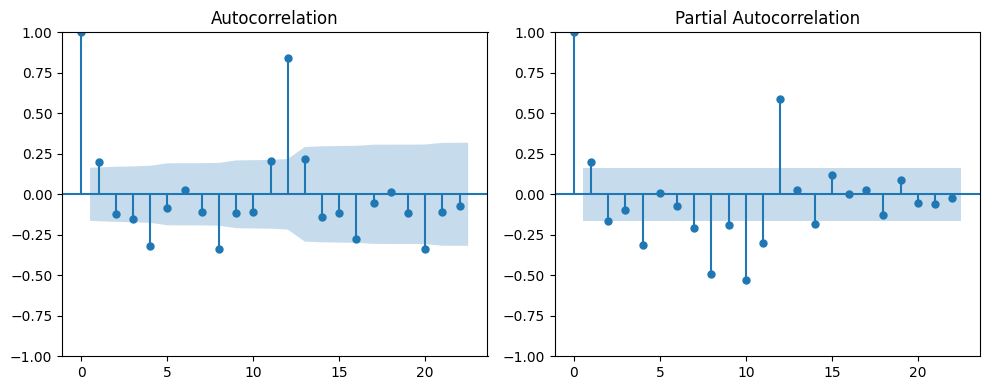

In [26]:
plt.figure(figsize = (10, 4))

plt.subplot(121)
plot_acf(ap_diff, ax = plt.gca())


plt.subplot(122)
plot_pacf(ap_diff, ax = plt.gca())  # lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨

plt.tight_layout()
plt.show()

- ACF plot 결과, `lag 1, 4, 8 12`에서 threshold를 초과하였음
- PACF plot 결과, `lag 1, 4, 8, 10, 11, 12`에서 thresohold를 초과하였음

- 정규성 검정을 위한 KPSS, ADF 검정은 기존에 다뤘기 때문에, 본 소스에서 생략하였음

## ⑥ Auto ARIMA 적용 및 결과 확인

- AutoARIMA 내부 인자의 의미를 알아봅시다.
  - seasonal : False인 경우 non-seasonal model로 제한합니다.
  - suppress_warnings : ARIMA를 실행하면 생기는 에러문구를 나오지 않도록 해줍니다.
  - trace : True일 때 오류(error)가 발생하면 일부 내용을 출력합니다.
  - max_D : seasonal의 최대 값을 설정할 수 있습니다.

### ap_transformed로 학습

In [27]:
# train_test_split
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

ap_transformed_train.shape, ap_transformed_test.shape

((115, 1), (29, 1))

In [28]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12)
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-212.317, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.578, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-219.761, Time=0.57 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=1.79 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.665, Time=3.46 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0

제 코드에서는 `ARIMA(4, 1, 2)` 모델이 적합한 것으로 출력되었습니다

In [29]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True)

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape)
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
pd.DataFrame({
    'preds': preds,
    'LB': conf_int[:, 0], 'UB': conf_int[:,1]})

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------


,preds,LB,UB
115,6.198793,6.033616,6.363969
116,6.136151,5.905705,6.366596
117,6.082282,5.837321,6.327243
118,6.040516,5.791970,6.289061
119,6.039927,5.790380,6.289473
120,6.057910,5.807059,6.308761
121,6.088662,5.836415,6.340909
122,6.116508,5.864181,6.368835
123,6.137019,5.884563,6.389476
124,6.149596,5.896528,6.402665


In [30]:
# Auto ARIMA 결과 Summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 117.881
Date:                Thu, 11 Sep 2025   AIC                           -219.761
Time:                        07:53:12   BIC                           -197.872
Sample:                             0   HQIC                          -210.878
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0104      0.002      4.972      0.000       0.006       0.015
ar.L1          0.0685      0.137      0.499      0.618      -0.201       0.338
ar.L2          0.3821      0.140      2.736      0.006       0.108       0.656
ar.L3         -0.2057      0.108     -1.907      0.057      -0.417       0.006
ar.L4         -0.1990      0.113     -1.769      0.077      -0.420       0.022
ma.L1         -0.0957      0.108     -0.888      0.375      -0.307       0.116
ma.L2         -0.8502      0.119     -7.162      0.000      -1.083      -0.618
sigma2         0.0071      0.002      4.608      0.000       0.004       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.49
Prob(Q):                              0.88   Prob(JB):                         0.06
Heteroskedasticity (H):               1.04   Skew:                             0.16
Prob(H) (two-sided):                  0.90   Kurtosis:                         1.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
from sklearn.metrics import root_mean_squared_error

# 복원시킨 데이터와의 RMSE 계산
# np.exp(preds)와 ap[train_size:]를 비교합니다.
rmse_original_scale = root_mean_squared_error(np.exp(preds), ap[train_size:])
print(f'RMSE on original scale: {rmse_original_scale}')

RMSE on original scale: 84.57201993205946


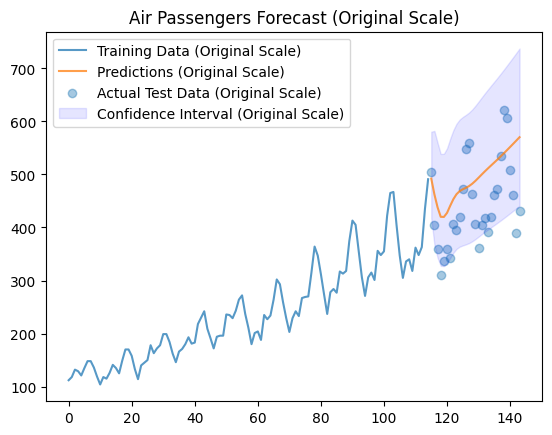

In [32]:
# 예측 성능을 시각화합니다.
# 복원된 예측값과 원래 test data를 비교합니다.

# 0. train과 test data를 축(axis)으로 만들었습니다.
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다.

# 복원된 예측값과 신뢰 구간
preds_original_scale = np.exp(preds)
conf_int_original_scale = np.exp(conf_int)


# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 훈련 데이터는 로그 변환되지 않은 원래 데이터를 사용합니다.
plt.plot(x_axis[:ap_transformed_train.shape[0]], ap[0:ap_transformed_train.shape[0]], alpha=0.75, label='Training Data (Original Scale)')

# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 복원된 예측값 시각화
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds_original_scale, alpha=0.75, label='Predictions (Original Scale)')

# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 원래 테스트 데이터 시각화
plt.scatter(x_axis[ap_transformed_train.shape[0]:], ap[train_size:], alpha=0.4, marker='o', label='Actual Test Data (Original Scale)')

# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
# 복원된 예측값에 대한 신뢰 구간 시각화
plt.fill_between(x_axis[ap_transformed_train.shape[0]:], conf_int_original_scale[:, 0], conf_int_original_scale[:, 1], alpha=0.1, color='b', label='Confidence Interval (Original Scale)')

plt.title("Air Passengers Forecast (Original Scale)") # plot의 제목
plt.legend() # 범례 추가
plt.show() # 4개의 plot을 시각화 합니다.

### ap_diff 로 학습

In [33]:
# train_test_split
def custom_train_test_split(X):
  train_size = int(len(X)*0.8)

  X_train = X[:train_size]
  X_test = X[train_size:]

  return X_train, X_test

ap_diff_train, ap_diff_test = custom_train_test_split(ap_diff)
ap_diff_train.shape, ap_diff_test.shape

((114, 1), (29, 1))

In [34]:
# AutoARIMA
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12)
res_diff = model.fit(ap_diff_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-189.957, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-196.702, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-196.895, Time=0.45 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-196.569, Time=0.38 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 10.675 seconds


-  이전 ap_transformed로 학습한 ARIMA 모델의 AIC과 비교 시, `ap_diff`로 학습한 ARIMA 모델의 AIC가 더 높음을 확인할 수 있음
- 따라서, `차분된 데이터`를 모델 학습에 활용해도 예측 모델의 성능 향상이 늘 보장이 되진 않는다라는 점을 확인

    - `ap_transformed`로 학습한 ARIMA(4,1,2) 모델의 AIC = -217.045
    - `ap_diff`로 학습한 ARIMA(0, 0, 2) 모델의 AIC = -196.569

In [35]:
preds_diff, conf_int_diff = res_diff.predict(n_periods=ap_diff_test.shape[0], return_conf_int=True)

# RMSE 계산
# 복원 1.Undifferencing
last_train_value_transformed = ap_transformed_train.iloc[-1].values[0]
undifferenced_preds_transformed = last_train_value_transformed + preds_diff.cumsum()

# 복원 2. 역변환
undifferenced_preds_original_scale = np.exp(undifferenced_preds_transformed)

rmse_original_scale_diff_model = root_mean_squared_error(undifferenced_preds_original_scale, ap[train_size:])
print('RMSE on original scale (from ap_diff model): ', rmse_original_scale_diff_model)

# Auto ARIMA 결과 Summary
# res_diff.summary() # summary는 모델 자체의 정보를 보여주므로 복원 후 다시 출력할 필요는 없습니다.

RMSE on original scale (from ap_diff model):  130.32004699628524


- AIC, BIC는 `ap_transformed`로 학습했을 때 결과가 좋았지만, RMSE는 `ap_diff`로 학습한 모델이 더 좋게 나타났음..
- 그 이유는?
  - 로그 변환 데이터로 학습한 ARIMA(4, 1, 2) 모델의 복잡성으로 인해 예측성능 저하
  - 차분 데이터로 학습한 ARIMA(0, 0,2) 모델의 일반화 능력이 더 우수

**결과 비교:**

- `ap_transformed`로 학습한 AutoARIMA 모델 (AIC: -219.761, BIC: -197.872, RMSE: 84.572)
- `ap_diff`로 학습한 AutoARIMA 모델 (AIC: -196.895, BIC: -185.950, RMSE: 446.195)

- AIC와 BIC 그리고 RMSE 기준으로 `ap_transformed`로 학습한 모델이 더 적합한 것으로 나타났음

### ap_transformed로 학습한 SARIMAX(4, 1, 2): 모델 평가

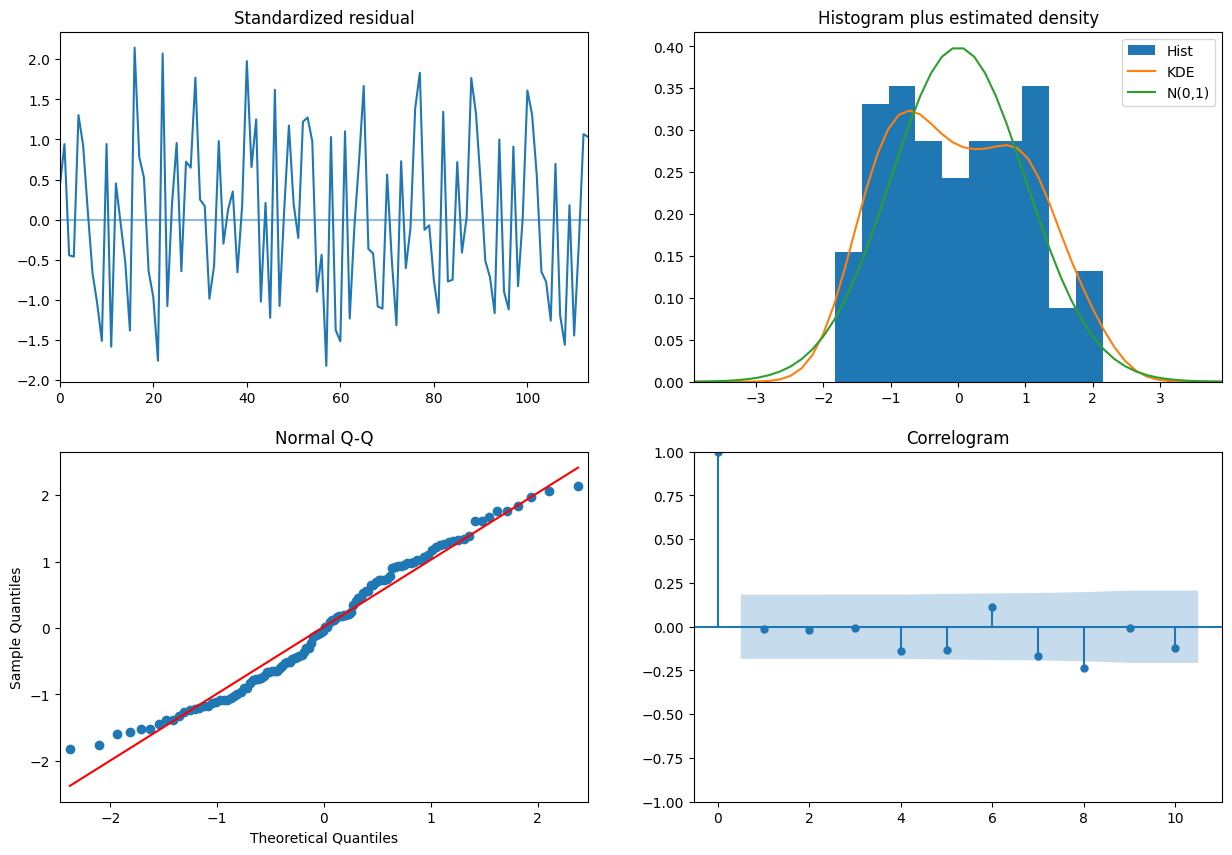

In [36]:
# res 객체의 model_ 속성을 통해 statsmodels 결과 객체에 접근합니다.
res.model_.plot_diagnostics(figsize=(15, 10))
plt.show()

plot_diagnostics 결과 해석
- Standardized Residuals (표준화된 잔차)이 `0`을 중심으로 무작위적으로 분포하는지 확인할 수 있음

- 히스토그램과 Q-Q plot을 통해 잔차의 정규성 여부에 대한 확인하였음

- Correlogram은 잔차에 대한 ACF plot으로 lag 0를 제외한 모든lag에서 파란 영역안에 있음을 보아 자기상관을 가지지 않음을 확인하였음

## ⑦ S&P500: ARCH 모델 실습해보기





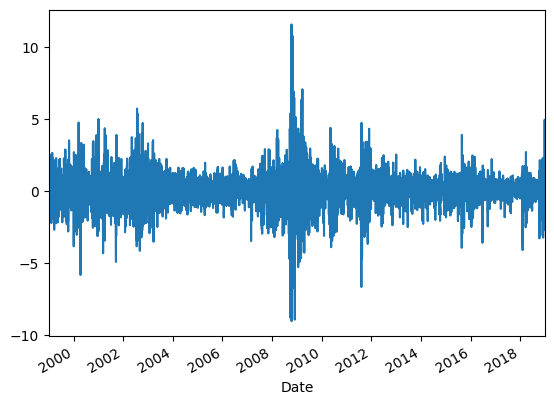

In [37]:
# ⑦-1 : 데이터 및 라이브러리 불러오기
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date

data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환

ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다.
plt.show()

- 강의에서 언급한 바와 같이, 조건부 이분산성(Conditional Heteroskedasticity)이 나타납니다.


### GARCH 모델

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.284960008103
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477484757
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Thu, Sep 11 2025   Df Residuals:                     5029
Time:         

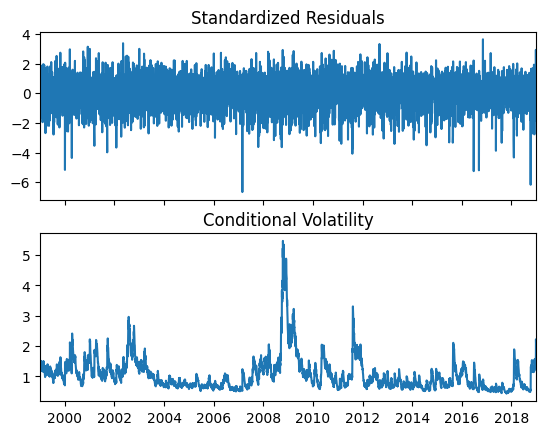

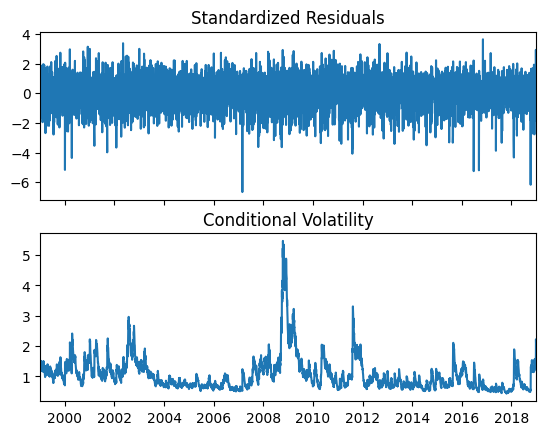

In [38]:
# ⑦-3 : ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

# ⑦-4 : 지표를 통한 결과 확인
print()
print(res.summary())
# 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

# ⑦-5 : 시각화를 통한 결과값 확인
res.plot()

- arch_model의 기본 모델이 'GARCH'로 되어 있어서 'ARCH' 모델로도 학습을 진행해봤음

### ARCH 모델

Iteration:      1,   Func. Count:      5,   Neg. LLF: 29578.85126371048
Iteration:      2,   Func. Count:     13,   Neg. LLF: 11424.58024616048
Iteration:      3,   Func. Count:     20,   Neg. LLF: 7987.266821860748
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7803.642713667179
Iteration:      5,   Func. Count:     30,   Neg. LLF: 7803.642680134059
Iteration:      6,   Func. Count:     33,   Neg. LLF: 7803.642680134136
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7803.642680134059
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7803.64
Distribution:                  Normal   AIC:

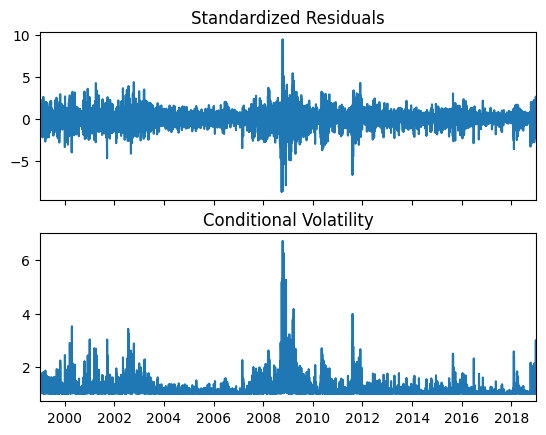

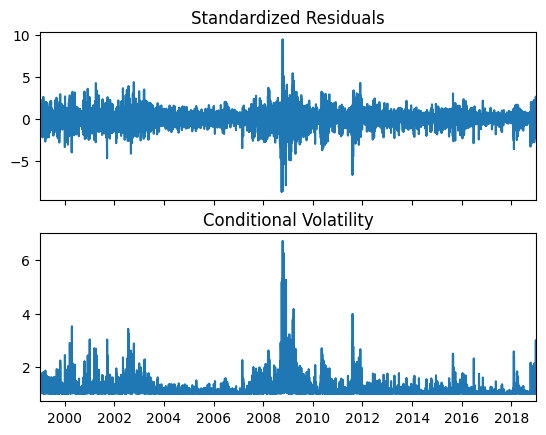

In [39]:
# ARCH Model 결과
from arch import arch_model

am = arch_model(returns, vol = 'ARCH') # vol = 'ARCH'으로 설정
res = am.fit()

print()
print(res.summary())

res.plot()

결과 비교
- `GARCH` 모델 결과 --> Log-likelyhood: -6936.72, AIC: 13881.4, BIC: 13907.5
- `ARCH` 모델 결과 --> Log-likelyhood: -7803.64, AIC: 15613.3, BIC: 15632.9
- Log-likelyhood, AIC, BIC 기준으로 모두 `GARCH` 모델이 더 적합한 것으로 도출되었음

## 총평
___
- 시계열 예측을 위한 정규성 확보를 위해 로그 변환, 차분을 통해 정규성 확보를 위한 분석을 수행하였음
- 로그 변환 및 차분된 시계열 데이터를 활용해 AutoARIMA로 학습을 진행 후 결과 비교를 수행하였음
  - 학습된 모델의 AIC, BIC 그리고 예측값(원 scale로 변환 후 계산한)과의 RMSE 비교를 통해 적합한 모델을 선택하였음
  - RMSE 비교를 통해 우수한 예측모델을 선정하는 것이 합리적인 분석과정이라고 판단하여 진행하였지만.. 원래 스케일로의 변환이 생각보다 어려웠음..
  - plot_diagnostics를 활용하여 전차의 정규성 및 자기 상관 존재여부를 확인하였음

- S&P500 데이터를 활용하여 Financial 시계열 예측을 위한 모델인 `ARCH` 와 `GARCH`모델을 활용한 에측을 수행하였음